## Visualization
- 목표 : 사망 환자와 퇴원 환자에서 D-10 ~ D-1의 feature 분포 시각화

In [239]:
import numpy as np, os
import pandas as pd

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

#한글설정
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)
    
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
# "axes.unicode_minus" : 마이너스가 깨질 것을 방지

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

# 필요한 데이터 로드

In [273]:
path = '/project/guri/'
X = np.load('/project/LSH/x_(7727,10,4068).npy')
y = np.load('/project/LSH/y_(7727,1).npy')
# 컬럼이름 로드
COLS = list(pd.read_csv(path + 'data/data2d_forposter.csv').columns)
#Reverse FI
fi = pd.read_csv(path + 'Restart/data/reverse_FI.csv')

# 사망/퇴원 환자 split

In [40]:
#death_index
d_index = np.where(y==1)[0]
#survive_index (퇴원 환자)
s_index = np.where(y==0)[0]

In [41]:
#사망/퇴원 환자 분리
d_X = X[d_index]
s_X = X[s_index]
d_X.shape, s_X.shape

((4718, 10, 4068), (3009, 10, 4068))

# 사망/퇴원 환자별 각 feature의 합 DF 생성

In [386]:
result = []
result_s = []
#day - 10일
for d in range(10):
    #4068 - ITEM
    for f in range(d_X.shape[-1]):
        d_sum = d_X[:,d,f].sum()/d_X.shape[0]
        s_sum = s_X[:,d,f].sum()/s_X.shape[0]
        result.append({'cols':COLS[f], 'day':10-d,'per':d_sum})
        result_s.append({'cols':COLS[f], 'day':10-d,'per':s_sum})

In [419]:
d_df = pd.DataFrame(result).sort_values(['cols','day'], ascending=[True, False]).reset_index(drop=True)
s_df = pd.DataFrame(result_s).sort_values(['cols','day'], ascending=[True, False]).reset_index(drop=True)
d_df.shape, s_df.shape

((40680, 3), (40680, 3))

In [420]:
s_df

,cols,day,per
0,0,10,0.458624
1,0,9,0.506481
2,0,8,0.558990
3,0,7,0.624128
4,0,6,0.685278
...,...,...,...
40675,998063006,5,0.000332
40676,998063006,4,0.000000
40677,998063006,3,0.000332
40678,998063006,2,0.000332


# FI 상위 feature만 visualization

In [421]:
#상위 10개 feature 추출
top_fi = fi[:10]['feature'].to_list()
top_fi

['409606211',
 '51479005520',
 '67434504',
 '74606211',
 '59011010325',
 '54858516',
 '50927',
 '409115170',
 '83000730',
 '2411260']

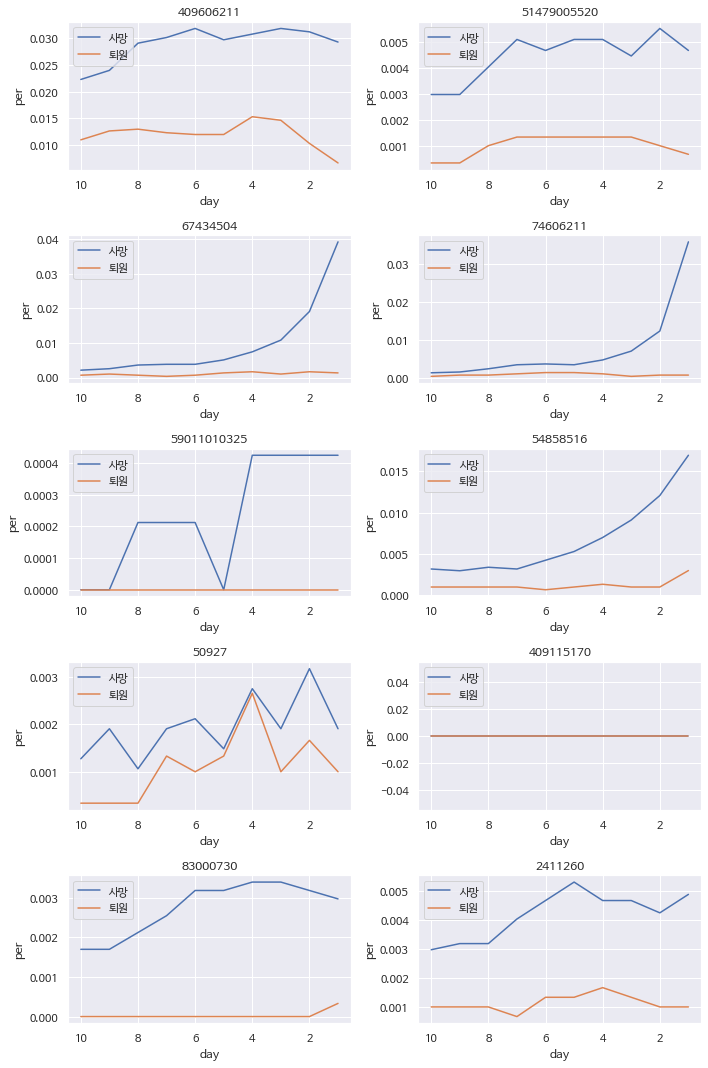

In [434]:
plt.figure(figsize=(10,15))
for i, f in enumerate(top_fi):
    plt.subplot(5,2,1+i)
    plt.title(f)
    ax = sns.lineplot(x = 'day', y='per', data = d_df[d_df['cols']==f], label='사망')
    ax = sns.lineplot(x = 'day', y='per', data = s_df[s_df['cols']==f], label='퇴원')
    ax.invert_xaxis()
    ax.legend(loc='upper left')
plt.tight_layout()

# PRE, PRO, LAB 각 Top10

In [290]:
merge_data = pd.read_csv(path + 'data/merge_data.csv')[['ITEM','Type']]

In [299]:
merge_data = merge_data.drop_duplicates().rename(columns = {'ITEM':'feature'})
merge_data['feature'] = merge_data['feature'].astype('str')

In [300]:
merge_data.head(2)

,feature,Type
0,50882,LAB
1,50931,LAB


In [306]:
fi_type = pd.merge(fi, merge_data, how='left', on='feature')
fi_type

,feature,bce,Type
0,409606211,1.555772,PRE
1,51479005520,1.452610,PRE
2,67434504,1.417650,PRE
3,74606211,1.412228,PRE
4,59011010325,1.409537,PRE
...,...,...,...
4065,50890,1.144899,LAB
4066,904518661,1.144532,PRE
4067,63323038810,1.142256,PRE
4068,50856,1.139420,LAB


## PRE

In [315]:
pre_top10 = fi_type[fi_type['Type']=='PRE'][:10].feature.to_list()
pre_top10

['409606211',
 '51479005520',
 '67434504',
 '74606211',
 '59011010325',
 '54858516',
 '409115170',
 '83000730',
 '2411260',
 '10019021302']

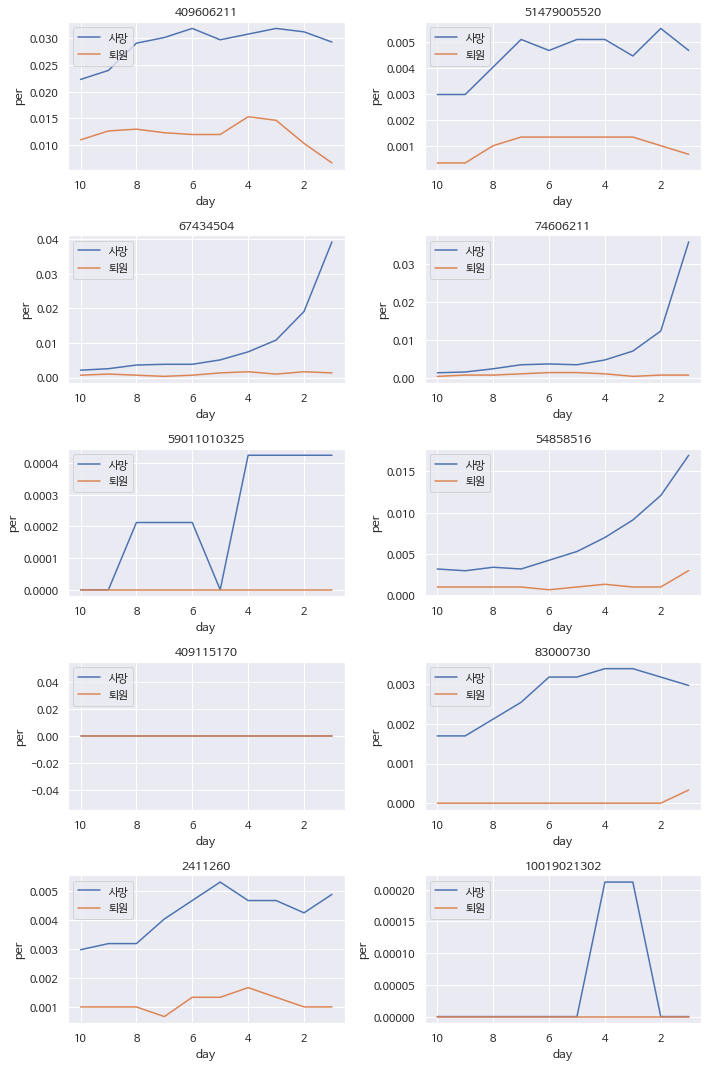

In [433]:
plt.figure(figsize=(10,15))
for i, f in enumerate(pre_top10):
    plt.subplot(5,2,1+i)
    plt.title(f)
    ax = sns.lineplot(data = d_df[d_df['cols']==f], x = 'day', y='per', label='사망')
    ax = sns.lineplot(data = s_df[s_df['cols']==f], x = 'day', y='per', label='퇴원')
    ax.invert_xaxis()
    ax.legend(loc='upper left')
plt.tight_layout()

## PRO

In [316]:
pro_top10 = fi_type[fi_type['Type']=='PRO'][:10].feature.to_list()
pro_top10

['225457',
 '225400',
 '225315',
 '228125',
 '225462',
 '225802',
 '225465',
 '228127',
 '225789',
 '225466']

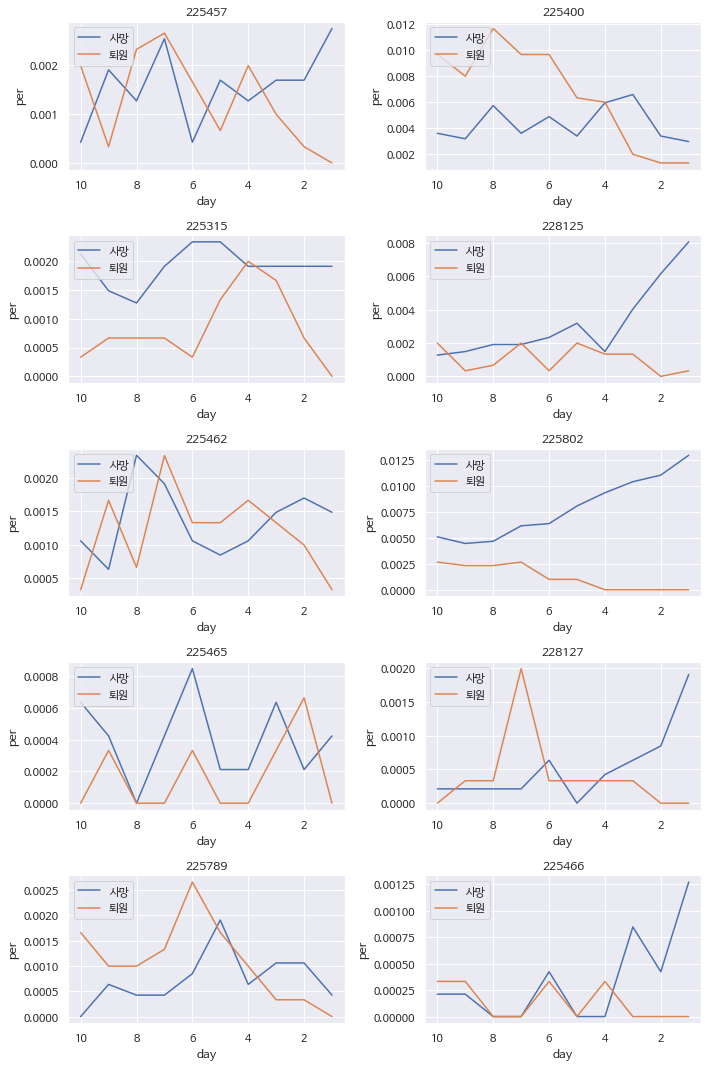

In [432]:
plt.figure(figsize=(10,15))
for i, f in enumerate(pro_top10):
    plt.subplot(5,2,1+i)
    plt.title(f)
    ax = sns.lineplot(data = d_df[d_df['cols']==f], x = 'day', y='per', label='사망')
    ax = sns.lineplot(data = s_df[s_df['cols']==f], x = 'day', y='per', label='퇴원')
    ax.invert_xaxis()
    ax.legend(loc='upper left')
plt.tight_layout()

## LAB
**['50927', '51148', '51128', '51116', '51127', '51479', '51120', '51213', '51302', '50990']**
- ITEMID : LABEL / LONIC_CODE
  - 50927 : Gamma Glutamyltransferase / [2324-2](https://loinc.org/2324-2/)
  - 51148 : Blasts / [708-8](https://loinc.org/708-8/)
    -  The presence of blasts in the peripheral blood is a marker for hematologic malignancy. \
    (말초혈에 폭발이 있다는 것은 혈액학적 악성종양의 표식이다.)
  - 51128 : WBC, Ascites / [26468-9](https://loinc.org/26468-9/)
    - 백혈구 또는 백혈구(WBC)는 감염, 신엽 및 기타 염증 조건과 싸우고 알레르기 반응을 중재하는 면역세포다.
  - 51116 : Lymphocytes / [26482-0](https://loinc.org/26482-0/)
    - 림프 조직에서 형성된 백혈구
  - 51127 : RBC, Ascites / [26457-2](https://loinc.org/26457-2/)
    - 복막 유체의 적혈구
  - 51479 : Granular Casts / [5793-5](https://loinc.org/5793-5/)
    - 현미경 저전력장치에 의한 소변 침전물 내 미세 주조물
  - 51120 : Monocytes / [26488-7](https://loinc.org/26488-7/)
    - 단핵세포는 면역반응의 초기화에 밀접하게 관여하는 단핵 백혈구
  - 51213 : Fibrin Degradation Products / [30226-5](https://loinc.org/30226-5/)
    - 혈소판 불량 혈장 내 피브린+피브리노겐 파편
  - 51302 : Young Cells / [51633-6](https://loinc.org/51633-6/)
  - 50990 : Theophylline / [4049-3](https://loinc.org/4049-3/)

['50927', '51148', '51128', '51116', '51127', '51479', '51120', '51213', '51302', '50990']


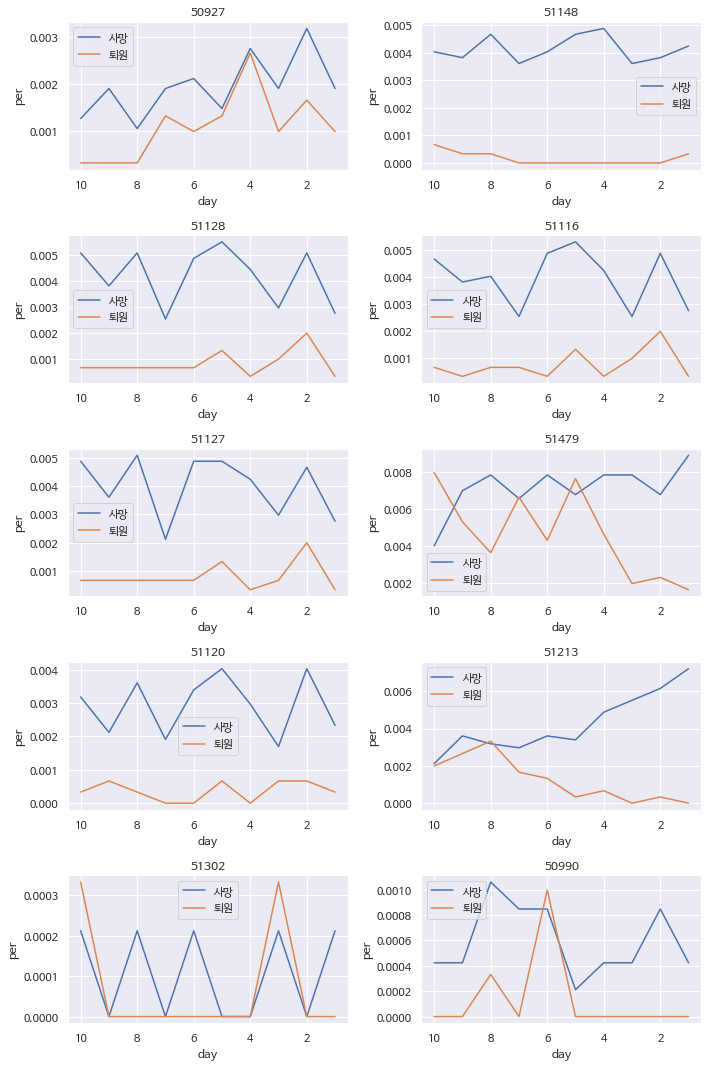

In [426]:
lab_top10 = fi_type[fi_type['Type']=='LAB'][:10].feature.to_list()
print(lab_top10)

plt.figure(figsize=(10,15))
for i, f in enumerate(lab_top10):
    plt.subplot(5,2,1+i)
    plt.title(f)
    ax = sns.lineplot(data = d_df[d_df['cols']==f], x = 'day', y='per', label='사망')
    ax = sns.lineplot(data = s_df[s_df['cols']==f], x = 'day', y='per', label='퇴원')
    ax.invert_xaxis()
plt.tight_layout()